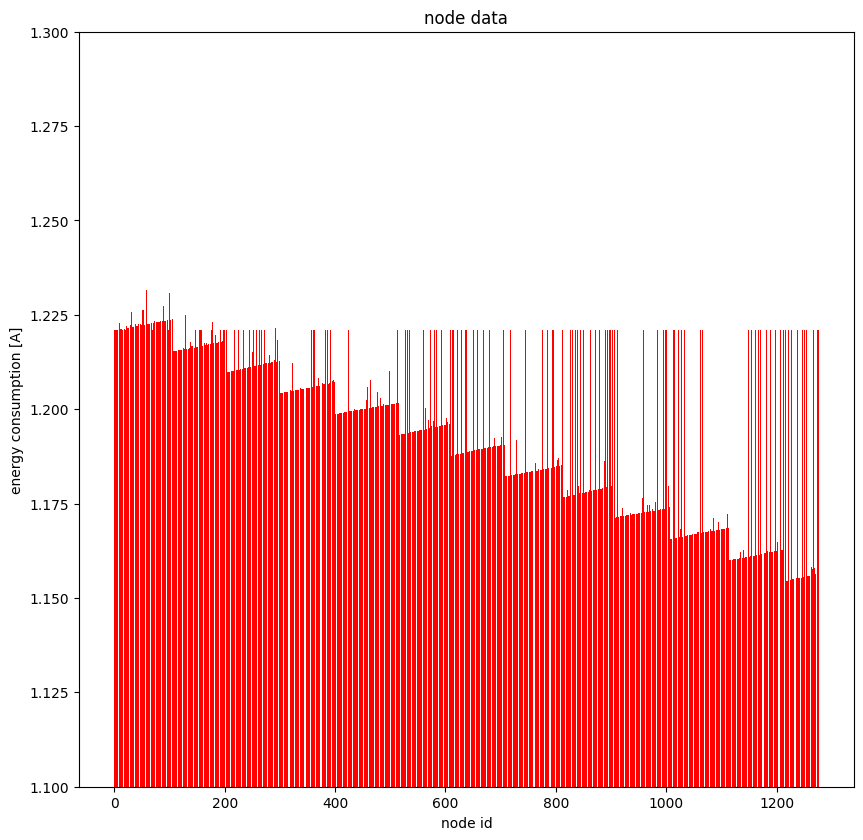

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import dataclasses
import copy
import datetime

@dataclasses.dataclass
class NodeData:
    id: int
    pos_x: float
    pos_y: float
    pos_z: float
    activation_time: float
    connection_interval: float
    total_energy_consumption: float
    lora_energy_consumption: float
    ble_energy_consusmption: float
    
        
csv_file = "/home/vagrant/workspace/tozastation/ns-3.30/scratch/heterogeneous_wireless/log.csv"
node_datas = []
node_data_csv = pd.read_csv(csv_file)

for index, row in node_data_csv.iterrows():
    node = NodeData(
        int(row[0]), 
        round(float(row[1]), 6),
        round(float(row[2]), 6),
        round(float(row[3]), 6),
        round(float(row[4]), 6),
        round(float(row[5]), 6),
        round(float(row[6]), 6),
        round(float(row[7]), 6),
        round(float(row[8]), 6)
    )
    node_datas.append(node)

fig = plt.figure(figsize=(10, 10), dpi=100)
ax = fig.add_subplot(111)
ax.set_title("node data")
ax.set_xlabel("node id")
ax.set_ylabel("energy consumption [A]")
ax.set_ylim(1.1, 1.30)
for node_data in node_datas:
    # print(node_data.total_energy_consumption)
    ax.bar(node_data.id, node_data.total_energy_consumption, color='r')

file_prefix = datetime.datetime.now().isoformat()
file_name = file_prefix + "_energy_consumption.png"
fig.savefig("/home/vagrant/workspace/tozastation/ns-3.30/scratch/heterogeneous_wireless/" + file_name)

In [23]:
import datetime
datetime.datetime.now().isoformat()

'2020-04-28T15:58:22.834897'